# Explicacion como contexto

# preguntas


# soluciones 
---

In [85]:
import pandas as pd 
import zipfile
import kaggle

In [86]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [88]:
data_bikes = pd.read_csv('london_merged.csv')

In [89]:
# Estadísticas descriptivas
data_bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Análisis descriptivo de datos de uso de bicicletas

## Estadísticas Descriptivas Generales

Las estadísticas descriptivas proporcionan una visión general de las características del conjunto de datos sobre el uso compartido de bicicletas. A continuación se analiza cada una de las variables presentes:

### Variable `cnt` (Número de bicicletas compartidas)
- **Media**: 1143.10
- **Desviación Estándar**: 1085.11
- **Mínimo**: 0
- **Máximo**: 7860
- Observación: Gran variabilidad en el número de bicicletas alquiladas por hora. En las mejores horas, la demanda puede ser muy alta.

### Variables de Temperatura `t1` (Real) y `t2` (Sensación Térmica)
- **Media t1**: 12.47°C
- **Media t2**: 11.52°C
- **Mínimo t1**: -1.5°C, **Máximo t1**: 34°C
- **Mínimo t2**: -6°C, **Máximo t2**: 34°C
- Observación: La sensación térmica generalmente es más baja que la temperatura real, lo que puede influir en el uso de las bicicletas.

### Variable `hum` (Humedad en %)
- **Media**: 72.32%
- **Rango**: 20.5% a 100%
- Observación: Humedad relativamente alta, con condiciones que varían desde muy secas hasta completamente húmedas.

### Variable `wind_speed` (Velocidad del Viento en km/h)
- **Media**: 15.91 km/h
- **Rango**: 0 a 56.5 km/h
- Observación: Velocidad del viento moderada con momentos de calma total y otros de vientos fuertes.

### Variable `weather_code` (Código de Clima)
- **Media**: 2.72
- **Rango**: 1 a 26
- Observación: Los códigos más bajos, posiblemente condiciones más claras y tranquilas, son más comunes.

### Variables Booleanas `is_holiday` (Si es Día Festivo) y `is_weekend` (Si es Fin de Semana)
- **Días Festivos**: 2.2% son festivos
- **Fines de Semana**: 28.54% son de fin de semana
- Observación: Mayoría de las entradas en días laborables y no de fin de semana, lo que podría influir en el uso.

### Variable `season` (Estaciones del Año)
- **Rango**: 0 (primavera) a 3 (invierno)
- Observación: Presencia de todas las estaciones, útil para analizar el efecto estacional.

## Sugerencias para Análisis Adicionales

1. **Correlación entre Variables**: Analizar cómo variables como temperatura, humedad y velocidad del viento se relacionan con el uso de bicicletas.
2. **Modelos Predictivos**: Utilizar estos datos para construir modelos predictivos de la demanda de bicicletas basados en las condiciones climáticas y otros factores.
3. **Análisis de Series Temporales**: Explorar tendencias estacionales o diarias en el uso de las bicicletas utilizando las marcas de tiempo.


In [90]:
df = data_bikes.copy()
def RenameColumns(data):
    data.columns = ['Time', 'Count', 'Real_time', 'Temp_feels', 'Humidity_percent', 'Wind_speed_km/h', 'Weather', 'is_holiday', 'is_weekend', 'season']
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return data

def DateExtarct(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data['Year'] = data['Time'].dt.year
    data['Month'] = data['Time'].dt.month
    data['Day'] = data['Time'].dt.day
    data['Hour'] = data['Time'].dt.hour
    data['Minute'] = data['Time'].dt.minute
    return data

def StringName(data):
    data['season'] = data['season'].replace([0.0, 1.0, 2.0, 3.0], ['Spring', 'Summer', 'Fall', 'Winter'])
    data['Weather'] = data['Weather'].replace([1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 26.0],
                                              ['Clear', 'Scattered clouds', 'Broken clouds', 'Cloudy', 'Rain', 'Thunderstorm', 'Snow'])
    return data 

In [91]:
df_bikes = RenameColumns(data_bikes)
df_bikes = StringName(df_bikes)
df_bikes = DateExtarct(df_bikes)
df = RenameColumns(df)
df = DateExtarct(df)


In [92]:
# Esta data la usaremos para otro sofware como tableu o power bi
df_bikes.head(2)

,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,Day,Hour,Minute
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,Winter,2015,1,4,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015,1,4,1,0


# 1.Correlacion entre variables

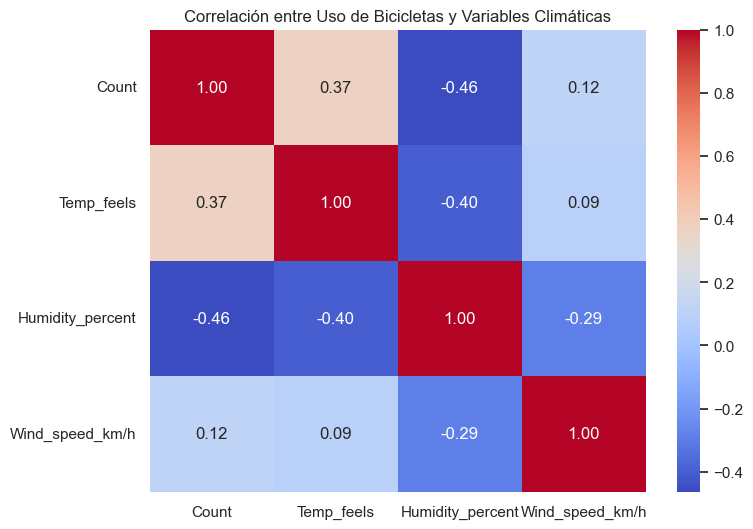

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando la matriz de correlación
correlation_matrix = df[['Count', 'Temp_feels', 'Humidity_percent', 'Wind_speed_km/h']].corr()

# Visualizando la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre Uso de Bicicletas y Variables Climáticas')
plt.show()

## Temperatura Percibida

* La temperatura tiene una correlación positiva (0.37) con el uso de bicicletas.
Insight: Cuando las temperaturas son más altas, se observa un aumento en el uso de bicicletas


* Existe una correlación negativa moderada (-0.46) entre la humedad y el uso de bicicletas.
Insight: Niveles más altos de humedad tienden a disminuir la cantidad de usuarios de bicicletas, probablemente debido a la incomodidad que causa
Velocidad del Viento

* Hay una correlación positiva muy débil (0.12) con el uso de bicicletas, lo cual es estadísticamente poco significativo
Insight: La velocidad del viento parece tener un impacto mínimo en la decisión de las personas de usar bicicletas


Conclusiones para el Cliente: 

La temperatura percibida es el factor climático con mayor influencia en el uso de bicicletas, seguido por la humedad. 

La velocidad del viento es menos relevante para predecir este comportamiento. Estos hallazgos pueden guiar estrategias de marketing y operaciones, especialmente en la promoción del uso de bicicletas en días cálidos y menos húmedos.

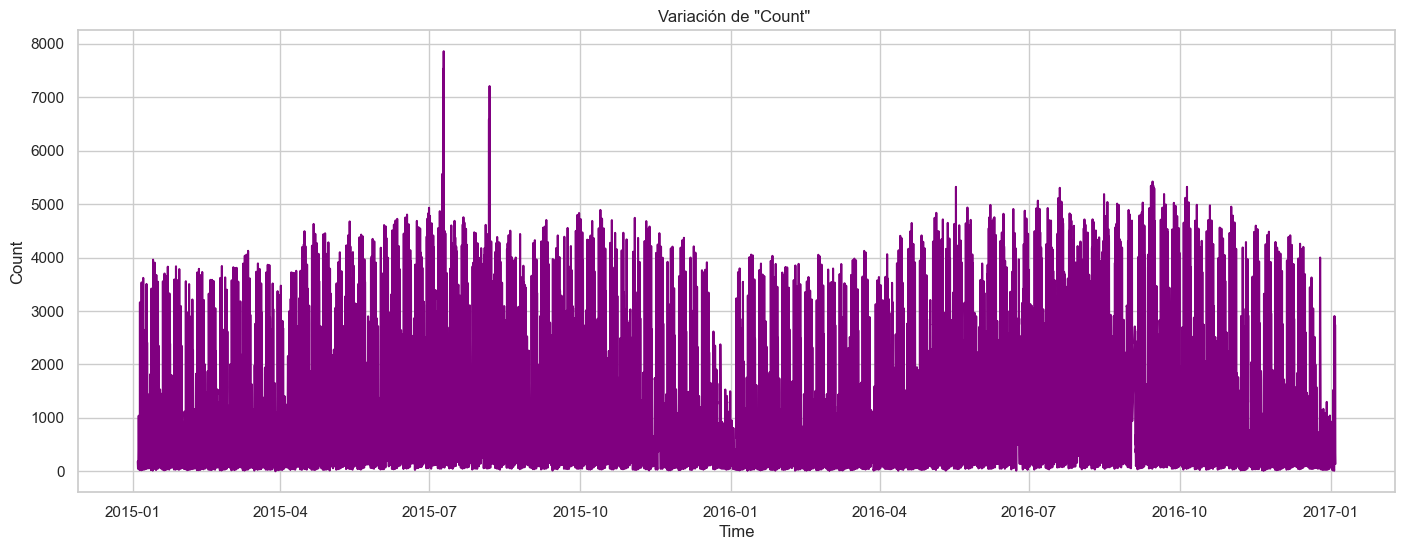

In [94]:
def PlotCountByYear(data):
    plt.figure(figsize=(17, 6))
    sns.lineplot(x='Time', y='Count', data=data, color='purple')
    plt.title('Variación de "Count" ')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.show()


PlotCountByYear(df)

In [95]:
df_2016 = df[df['Year'] == 2016]
df_2015 = df[df['Year'] == 2015]

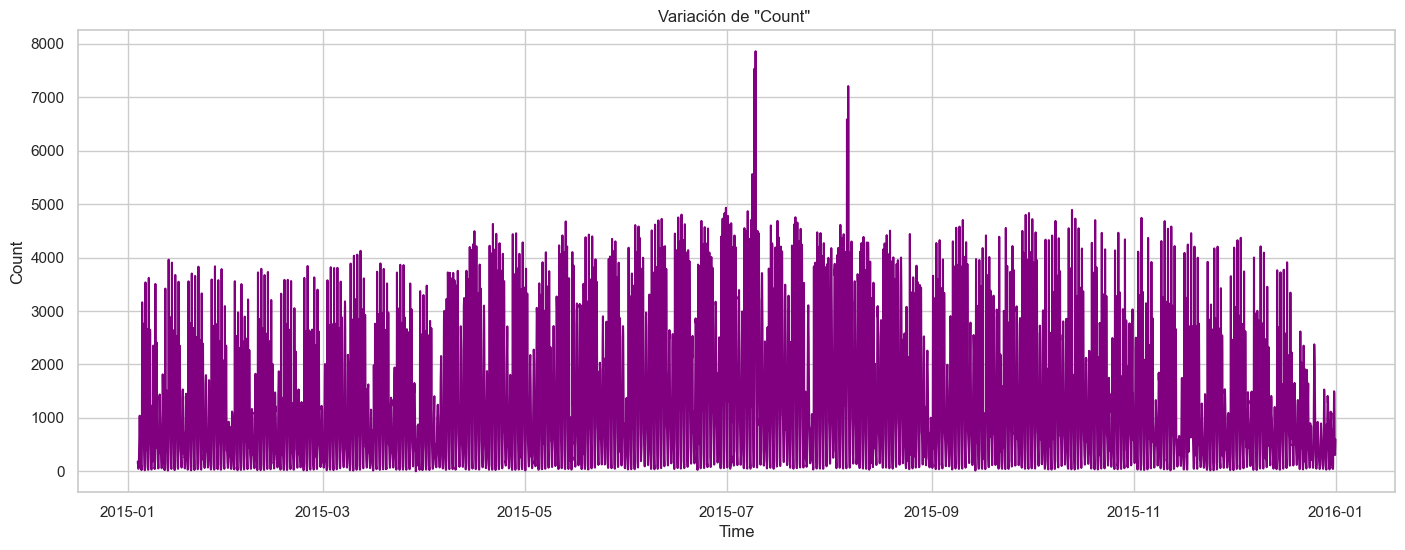

In [96]:
PlotCountByYear(df_2015)

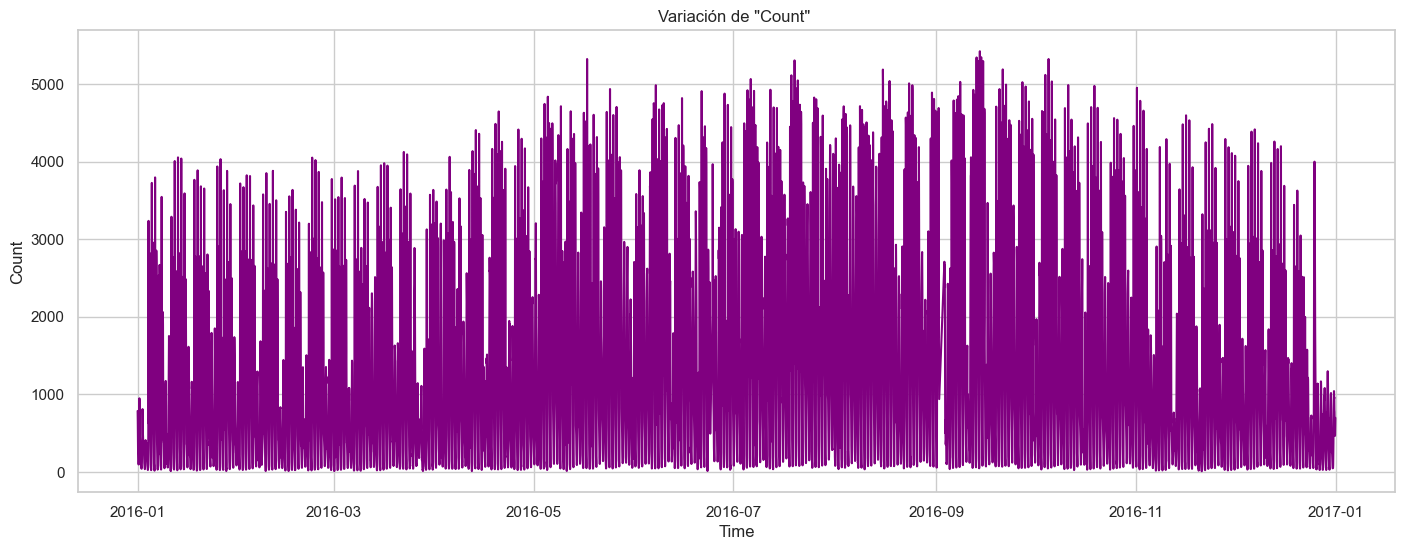

In [97]:
PlotCountByYear(df_2016)

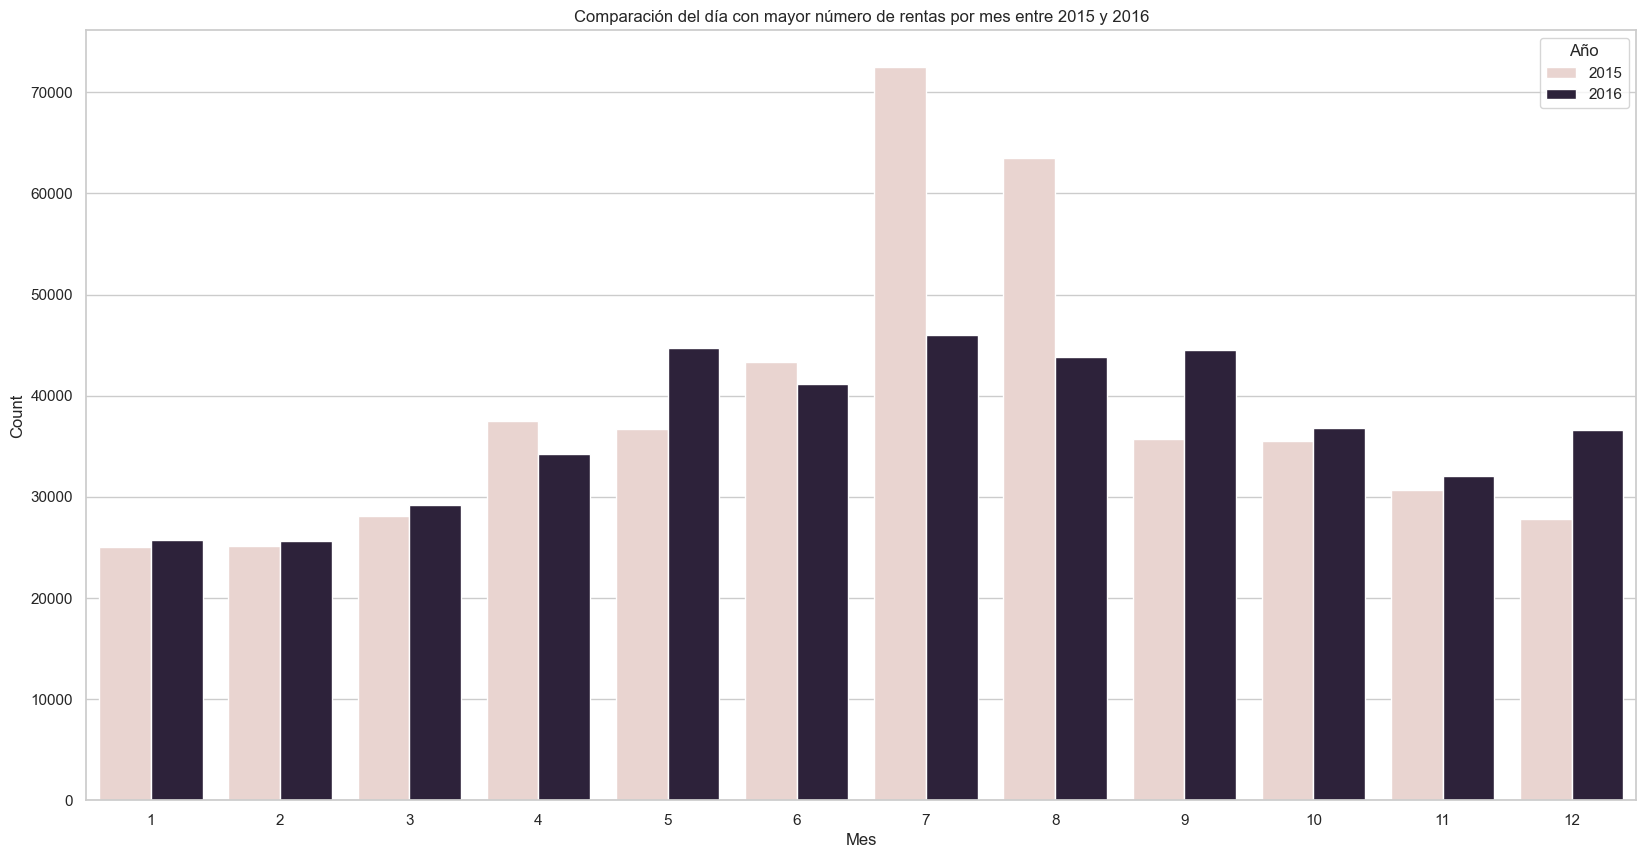

In [114]:
df_filtered = df[df['Year'].isin([2015, 2016])]
# Agrupar por año, mes y día, sumando 'Count'
daily_counts = df_filtered.groupby(['Year', 'Month', 'Day'])['Count'].sum().reset_index()
# Encontrar el día con el máximo 'Count' para cada mes de cada año
max_days_per_month = daily_counts.loc[daily_counts.groupby(['Year', 'Month'])['Count'].idxmax()]
# Ahora podemos graficar los resultados con ambos años en la misma gráfica
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Count', hue='Year', data=max_days_per_month, dodge=True)
plt.title('Comparación del día con mayor número de rentas por mes entre 2015 y 2016')
plt.xlabel('Mes')
plt.ylabel('Count')
plt.legend(title='Año')
plt.show()

No podemos comparar como tal un dia del año 2015 con el 2016, ya que no tenemos datos de los mismos dias en ambos años, es decir el domingo 1 de enero de 2015 no es el mismo que el domingo 1 de enero de 2016, por lo que no podemos compararlos directamente como tal pero si podemos intentar saber que dia se renta mas es decir si los domingos se renta mas por fin de semana

# 2. Modelos Predictivos